In [69]:
import pandas as pd
import os
import itertools
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from importlib import reload
import numpy as np

In [70]:
df = pd.read_hdf('data_mab.h5')
df = df.transpose()
df = df.cumsum()

In [71]:
! pip install seaborn==0.10.0

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [72]:
idx = df.columns
alphas = idx.get_level_values(level='alpha').unique()
alphas

Index(['1000000000', '10', '2', '0.99999', '0.5', '1e-05'], dtype='object', name='alpha')

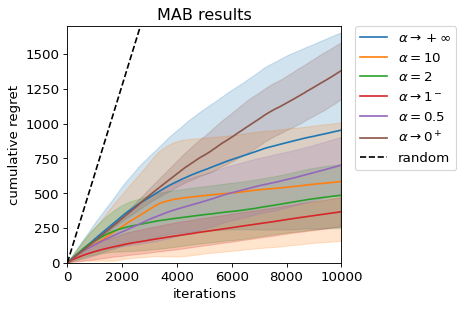

In [73]:
alphas = ['1000000000', '10', '2', '0.99999', '0.5', '1e-05']

matplotlib.rcParams['figure.figsize'] = [8.0, 6.0]
matplotlib.rcParams['figure.dpi'] = 80
matplotlib.rcParams['savefig.dpi'] = 100
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['legend.fontsize'] = 'medium'
matplotlib.rcParams['figure.titlesize'] = 'medium'
colors = itertools.cycle(["b", "b", "g", "b", "b"])

f, ax = plt.subplots(1, 1, figsize=(6,4))
s = df.droplevel('LogValue', axis=1)\
        .droplevel('Run', axis=1)\
        .set_index(np.arange(999)*10)
sns.lineplot(data=s, ax=ax, dashes=None, hue='alpha', ci='sd',
             hue_order=alphas, color=next(colors), legend=False)
sns.lineplot([0,1700*1.5666666],[0,1700], color='black')
ax.lines[6].set_linestyle("--")
ax.set_xlim([0,10000])
ax.set_ylim([0,1700])
ax.set(xlabel='iterations', ylabel='cumulative regret', title='MAB results')
ax.grid(False)
plt.legend([r'$\alpha \rightarrow +\infty$', r'$\alpha = 10$', r'$\alpha = 2$', r'$\alpha \rightarrow 1^-$',
            r'$\alpha = 0.5$', r'$\alpha \rightarrow 0^+$', 'random'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

f.tight_layout(pad=1.0)
f.savefig('mab_regret.pdf', bbox_inches='tight', pad_inches=0)